## Fetching Dataset

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [5]:
x,y = mnist["data"], mnist['target']

In [6]:
x.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
%matplotlib inline

In [9]:
import matplotlib
import matplotlib.pyplot as plt

In [10]:
import numpy as np
some_digit = np.array(x.iloc[36001])
some_digit_image = some_digit.reshape(28,28)#lets reshape it to plot it

(-0.5, 27.5, 27.5, -0.5)

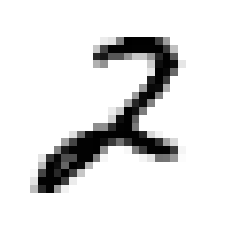

In [11]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [12]:
y[36001]

'2'

In [13]:
x_train, x_test = x[:60000], x[60000:70000]

In [14]:
y_train, y_test = y[:60000], y[60000:70000]

In [15]:
shuffle_index = np.random.permutation(60000)
x_train = x_train.iloc[shuffle_index]
y_train = y_train.iloc[shuffle_index]

## Creating a 2 detector

In [16]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [17]:
y_train

15343    8
668      0
12442    9
10811    5
21298    6
        ..
49652    5
28845    5
1678     0
24488    6
47980    6
Name: class, Length: 60000, dtype: int8

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf = LogisticRegression(tol = 0.1)

In [20]:
clf.fit(x_train,y_train_2)

C:\Users\nikit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [21]:
clf.predict([some_digit])

C:\Users\nikit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

In [22]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train , y_train_2, cv = 3, scoring="accuracy")

C:\Users\nikit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nikit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

In [23]:
a

array([0.97775, 0.97955, 0.97735])

In [24]:
a.mean()

0.9782166666666666

## K-Nearest Neighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import pandas as pd

In [26]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()
y_train = y_train.to_numpy()

In [27]:
score = []

for k in range(1, 9):
  print('Begin KNN with k=',k)
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier = classifier.fit(x_train.reshape(x_train.shape[0], 28*28), y_train)
  pred = classifier.predict(x_test.reshape(x_test.shape[0], 28*28))
  accuracy = accuracy_score(y_test, pred)
  score.append(accuracy)
  print("Accuracy: ",accuracy)
  print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
  print("\n---------------\n")

Begin KNN with k= 1
Accuracy:  0.9691
Confusion Matrix:
 [[ 973    1    1    0    0    1    3    1    0    0]
 [   0 1129    3    0    1    1    1    0    0    0]
 [   7    6  992    5    1    0    2   16    3    0]
 [   0    1    2  970    1   19    0    7    7    3]
 [   0    7    0    0  944    0    3    5    1   22]
 [   1    1    0   12    2  860    5    1    6    4]
 [   4    2    0    0    3    5  944    0    0    0]
 [   0   14    6    2    4    0    0  992    0   10]
 [   6    1    3   14    5   13    3    4  920    5]
 [   2    5    1    6   10    5    1   11    1  967]]

---------------

Begin KNN with k= 2
Accuracy:  0.9627
Confusion Matrix:
 [[ 976    1    1    0    0    1    0    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11   10  995    1    2    0    0   12    1    0]
 [   1    1    8  981    1    9    0    6    2    1]
 [   3    7    0    0  959    0    2    3    0    8]
 [   6    2    0   25    2  850    2    1    1    3]
 [   7    3    0   

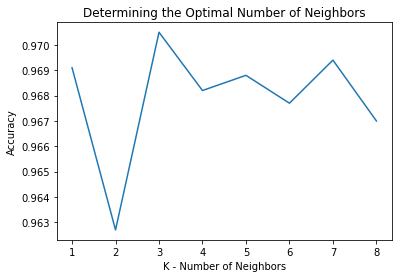

In [28]:
plt.plot(range(1,9), score)
plt.title('Determining the Optimal Number of Neighbors')
plt.xlabel('K - Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Testing the model

In [29]:
x = x.to_numpy()
y = y.to_numpy()

In [30]:
%%time
print('Training the Model')
classifier = KNeighborsClassifier(n_neighbors=3)
classifier = classifier.fit(x.reshape(x.shape[0], 28*28), y)

Training the Model
Wall time: 12.6 s


In [31]:
%%time
y_pred = classifier.predict(x_test.reshape(x_test.shape[0], 28*28))

Wall time: 53.9 s


In [32]:
y_pred = y_pred.astype(np.int32)

In [33]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 977    1    1    0    0    0    0    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [   4    2 1016    0    0    0    1    8    1    0]
 [   1    0    1 1000    0    4    0    4    0    0]
 [   0    3    0    0  968    0    3    2    0    6]
 [   2    0    0    3    1  880    2    1    1    2]
 [   4    2    0    0    2    2  948    0    0    0]
 [   0   10    4    1    0    0    0 1009    0    4]
 [   4    0    3    8    3    6    2    2  944    2]
 [   2    1    0    3    4    3    1    4    0  991]]
0.9866


In [34]:
from sklearn.metrics import classification_report
classification_report(y_pred, y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99       994\n           1       1.00      0.98      0.99      1152\n           2       0.98      0.99      0.99      1027\n           3       0.99      0.99      0.99      1015\n           4       0.99      0.99      0.99       978\n           5       0.99      0.98      0.98       895\n           6       0.99      0.99      0.99       957\n           7       0.98      0.98      0.98      1031\n           8       0.97      1.00      0.98       946\n           9       0.98      0.99      0.98      1005\n\n    accuracy                           0.99     10000\n   macro avg       0.99      0.99      0.99     10000\nweighted avg       0.99      0.99      0.99     10000\n'

## SVM Classification

In [37]:
from sklearn.svm import SVC
classifier2 = SVC()

In [39]:
y_pred2 = classifier2.predict(x_test.reshape(x_test.shape[0],28*28))
classifier2 = classifier2.fit(x.reshape(x.shape[0], 28*28), y)

## Predict

In [45]:
y_pred2 = y_pred2.astype(np.int32)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [46]:
confusion_matrix(y_test, y_pred2)

array([[ 975,    0,    1,    0,    0,    1,    0,    1,    2,    0],
       [   0, 1133,    0,    0,    0,    1,    0,    0,    1,    0],
       [   1,    0, 1024,    0,    1,    0,    0,    4,    2,    0],
       [   0,    0,    0, 1002,    0,    2,    0,    3,    3,    0],
       [   0,    0,    0,    0,  975,    0,    1,    0,    0,    6],
       [   2,    0,    0,    2,    0,  885,    2,    0,    0,    1],
       [   2,    2,    0,    0,    2,    2,  949,    0,    1,    0],
       [   0,    4,    4,    1,    0,    0,    0, 1015,    0,    4],
       [   0,    0,    2,    2,    1,    2,    1,    1,  965,    0],
       [   1,    3,    0,    4,    8,    2,    0,    3,    0,  988]],
      dtype=int64)

## Results

KNN Model with 3 neighbors performed really well with 98.66% accuracy.

In [35]:
import joblib

joblib.dump(classifier, 'knn_model.gzip', compress=('gzip',3))

['knn_model.gzip']

In [50]:
joblib.dump(classifier2, 'SVC_model.gzip', compress=('gzip',3))

['SVC_model.gzip']